# Self-Driving Car Engineer Nanodegree


## Project: Vehicle Detection and Tracking
---
The goal of this project is to create a software pipeline to identify vehicles in a video from a front-facing camera on a car. 

The goals / steps of this project are the following:
* Perform a [Histogram of Oriented Gradients (HOG)](http://scikit-image.org/docs/dev/auto_examples/features_detection/plot_hog.html) feature extraction on a labeled training set of images and train a classifier Linear SVM classifier
* Apply a color transform and append binned color features, as well as histograms of color, to your HOG feature vector (optionally).
* Normalize extracted features and randomize a selection for training and testing.
* Implement a sliding-window technique and use the trained classifier to search for vehicles in images.
* Run the pipeline on a video stream (start with the [test_video.mp4](test_video.mp4) and later implement on full [project_video.mp4](project_video.mp4) and create a heat map of recurring detections frame by frame to reject outliers and follow detected vehicles.
* Estimate a bounding box for vehicles detected.

This notebook is using python modules from [p5lib](p5lib/) package created for this project. Some of the modules were adopted from the class quiz example code. 

### Perform a [Histogram of Oriented Gradients (HOG)](http://scikit-image.org/docs/dev/auto_examples/features_detection/plot_hog.html) feature extraction on a labeled training set of images and train a classifier Linear SVM classifier ###

**1. Data Exploration**

Load project dataset from the `data/` folder 

In [1]:
from p5lib.data_preparation import data_load

# Dataset directories
cars_dir = 'data/vehicles'
notcars_dir = 'data/non-vehicles'

# load dataset images
cars, notcars = data_load(cars_dir, notcars_dir)
print('Loaded', len(cars), ' cars and', len(notcars), ' non-cars')

Loaded 8792  cars and 8968  non-cars


Plot random example images

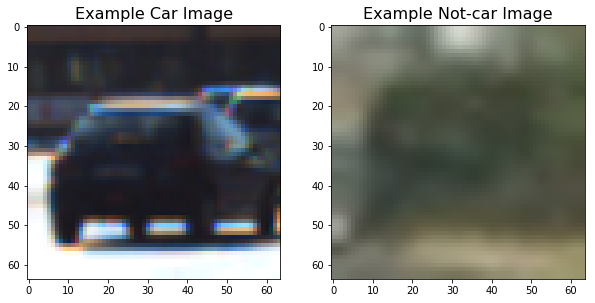

In [2]:
from p5lib.visualize import plt_two
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
%matplotlib inline

# Choose random car / not-car indices and plot example images   
car_ind = np.random.randint(0, len(cars))
notcar_ind = np.random.randint(0, len(notcars))
# Read in car / not-car images
car_image = mpimg.imread(cars[car_ind])
notcar_image = mpimg.imread(notcars[notcar_ind])
# Visualize
figure = plt_two(car_image, notcar_image, 'Example Car Image', 'Example Not-car Image', figsize=(10,10), fontsize=16)
figure.savefig('output_images/car_notcar_example.jpg')   # save the figure to file
plt.close(figure)    # close the figure

Get and print some characteristics of the dataset

In [3]:
from p5lib.data_preparation import data_look

data_info = data_look(cars, notcars)

print('The dataset contains', 
      data_info["n_cars"], ' cars and', 
      data_info["n_notcars"], ' non-cars')
print('of size: ',data_info["image_shape"], ' and data type:', 
      data_info["data_type"])


The dataset contains 8792  cars and 8968  non-cars
of size:  (64, 64, 3)  and data type: float32


**2. HOG feature extruction**


In [4]:
from p5lib.features import *
import numpy as np
import time

# Generate a random index to look at a car image
ind = np.random.randint(0, len(cars))

# Read in the image
image = mpimg.imread(cars[ind])
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

# Reduce the sample size because HOG features are slow to compute
# The quiz evaluator times out after 13s of CPU time
#sample_size = 500
#cars = cars[0:sample_size]
#notcars = notcars[0:sample_size]

# HOG parameters
orient = 9
pix_per_cell = 8
cell_per_block = 2
color_space='YCrCb'
hog_channel='ALL'
hog_feat=True

# Spatial parameters
spatial_size=(32, 32)
spatial_feat=True

# Histogram parameters
hist_bins=32
hist_feat=True

print('Using:', orient, 'orientations', pix_per_cell, 'pixels per cell and', cell_per_block,'cells per block')

# Measure time of feature extraction
t1=time.time()
print('Extracting HOG features...')

# Exctract cars features
car_features = extract_features(cars, color_space=color_space, spatial_size=spatial_size, hist_bins=hist_bins, orient=orient, 
                        pix_per_cell=pix_per_cell, cell_per_block=cell_per_block, hog_channel=hog_channel,
                        spatial_feat=spatial_feat, hist_feat=hist_feat, hog_feat=hog_feat)

# Exctract notcars features
notcar_features = extract_features(notcars, color_space=colorspace, spatial_size=spatial_size, hist_bins=hist_bins, orient=orient, 
                        pix_per_cell=pix_per_cell, cell_per_block=cell_per_block, hog_channel=hog_channel,
                        spatial_feat=spatial_feat, hist_feat=hist_feat, hog_feat=hog_feat)

t2 = time.time()
print(round(t2-t1, 2), 'Seconds to extract HOG features...')

# Create an array stack of feature vectors X
X = np.vstack((car_features, notcar_features)).astype(np.float64)                        
# Define the labels vector y
y = np.hstack((np.ones(len(car_features)), np.zeros(len(notcar_features))))

Using: 9 orientations 8 pixels per cell and 2 cells per block
Extracting HOG features...
126.57 Seconds to extract HOG features...


**3. Normalize extracted features**

In [5]:
from sklearn.preprocessing import StandardScaler
import time

# Measure time of feature normalization
t1=time.time()
print('Normalizing features...')

# Fit a per-column scaler
X_scaler = StandardScaler().fit(X)
# Apply the scaler to X
scaled_X = X_scaler.transform(X)

t2 = time.time()
print(round(t2-t1, 2), 'Seconds to normalize features...')

Normalizing features...
4.46 Seconds to normalize features...


**4. Randomize a selection for training and testing**

In [6]:
from sklearn.model_selection import train_test_split

# Split up data into randomized training and test sets
rand_state = np.random.randint(0, 100)
X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size=0.2, random_state=rand_state)
print('Feature vector length:', len(X_train[0]))

Feature vector length: 8460


**5. Train Linear SVM classifier and check performance**

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.svm import LinearSVC
import time

# Check the training time for the SVC
t=time.time()
print('Training SVC...')

# Use a linear SVC 
svc = LinearSVC()
svc.fit(X_train, y_train)
t2 = time.time()
print(round(t2-t, 2), 'Seconds to train SVC...')

# Check the score of the SVC
print('Test Accuracy of SVC = ', round(svc.score(X_test, y_test), 4))
# Check the prediction time for a single sample
t=time.time()
n_predict = 10
print('SVC predicts: ', svc.predict(X_test[0:n_predict]))
print('For these', n_predict, 'labels: ', y_test[0:n_predict])
t2 = time.time()
print(round(t2-t, 5), 'Seconds to predict', n_predict,'labels with SVC')

Save training parameters for later use

In [11]:
import pickle

# Save the training parameters for later use
svc_pickle = {}
svc_pickle["svc"] = svc
svc_pickle["scaler"] = X_scaler
svc_pickle["orient"] = orient
svc_pickle["pix_per_cell"] = pix_per_cell
svc_pickle["cell_per_block"] = cell_per_block
svc_pickle["spatial_size"] = spatial_size
svc_pickle["hist_bins"] = hist_bins
svc_pickle["hog_channel"] = hog_channel
pickle.dump(svc_pickle, open( "p5lib/svc_pickle.p", "wb" ) )
print('Saved')

Saved


### Implement a sliding-window technique and use the trained classifier to search for vehicles in images ###

In [ ]:
import pickle

svc_pickle = pickle.load( open("svc_pickle.p", "rb" ) )
svc = svc_pickle["svc"]
X_scaler = svc_pickle["scaler"]
orient = svc_pickle["orient"]
pix_per_cell = svc_pickle["pix_per_cell"]
cell_per_block = svc_pickle["cell_per_block"]
spatial_size = svc_pickle["spatial_size"]
hist_bins = svc_pickle["hist_bins"]

### 5. Run the pipeline on a video stream (start with the [test_video.mp4](test_video.mp4) and later implement on full [project_video.mp4](project_video.mp4) and create a heat map of recurring detections frame by frame to reject outliers and follow detected vehicles. ###

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from p5lib.visualize import *
%matplotlib inline

def pipeline(image):
    
    result = np.copy(image)
    return result

# Test pipeline
image = cv2.imread('test_images/test5.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
result = pipeline(image)
figure = plt_one(result, "Pipeline Test")
plt.close(figure)    # close the figure
#figure.savefig('output_images/test_pipeline.jpg')   # save the figure to file
plt.close(figure)    # close the figure


In [ ]:
# Import everything needed to edit/save/watch video clips
from moviepy.editor import VideoFileClip
from IPython.display import HTML


In [ ]:
white_output = 'project_video_output.mp4'
## To speed up the testing process you may want to try your pipeline on a shorter subclip of the video
## To do so add .subclip(start_second,end_second) to the end of the line below
## Where start_second and end_second are integer values representing the start and end of the subclip
## You may also uncomment the following line for a subclip of the first 5 seconds
clip1 = VideoFileClip("project_video.mp4").subclip(0,1)
#clip1 = VideoFileClip("project_video.mp4")
white_clip = clip1.fl_image(pipeline) #NOTE: this function expects color images!!
%time white_clip.write_videofile(white_output, audio=False)

Play the video inline, or if you prefer find the video in your filesystem (should be in the same directory) and play it in your video player of choice.

In [ ]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(white_output))